In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
air_data = pd.read_csv('data/death-rates-from-air-pollution.csv')
country_data = pd.read_csv('data/countries.csv')

In [5]:
air_data_copy = air_data.copy()
country_data_copy = country_data.copy()

In [6]:
columns_to_exclude = ['Name', 'Continent']

country_data_filtered = country_data_copy[columns_to_exclude]

In [7]:
air_data_merged = pd.merge(air_data_copy, country_data_filtered, left_on='Entity', right_on='Name', how='left')

air_data_merged.drop('Name', axis=1, inplace=True)

In [10]:
print('Shape of data: {}'.format(air_data_copy.shape))
display(air_data_copy.head())

indoor_deaths = air_data_merged['Indoor air pollution (deaths per 100,000)']
outdoor_deaths = air_data_merged['Outdoor particulate matter (deaths per 100,000)']
ozone_deaths = air_data_merged['Outdoor ozone pollution (deaths per 100,000)']

air_data_merged['Air pollution (total) (deaths per 100,000)'] = indoor_deaths + outdoor_deaths + ozone_deaths

print('Shape of data: {}'.format(air_data_merged.shape))
display(air_data_merged.head())

air_data_merged.to_csv('data/countries_pollution_sum.csv', index=False)
countries_sum = pd.read_csv('data/countries_pollution_sum.csv')
print('Shape of data: {}'.format(countries_sum.shape))
display(countries_sum.head())

Shape of data: (6468, 7)


,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


Shape of data: (6468, 8)


,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent
0,Afghanistan,AFG,1990,302.425941,250.362910,46.446589,5.616442,Asia
1,Afghanistan,AFG,1991,294.212926,242.575125,46.033841,5.603960,Asia
2,Afghanistan,AFG,1992,281.899466,232.043878,44.243766,5.611822,Asia
3,Afghanistan,AFG,1993,281.743548,231.648134,44.440148,5.655266,Asia
4,Afghanistan,AFG,1994,290.150427,238.837177,45.594328,5.718922,Asia


Shape of data: (6468, 8)


,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent
0,Afghanistan,AFG,1990,302.425941,250.362910,46.446589,5.616442,Asia
1,Afghanistan,AFG,1991,294.212926,242.575125,46.033841,5.603960,Asia
2,Afghanistan,AFG,1992,281.899466,232.043878,44.243766,5.611822,Asia
3,Afghanistan,AFG,1993,281.743548,231.648134,44.440148,5.655266,Asia
4,Afghanistan,AFG,1994,290.150427,238.837177,45.594328,5.718922,Asia


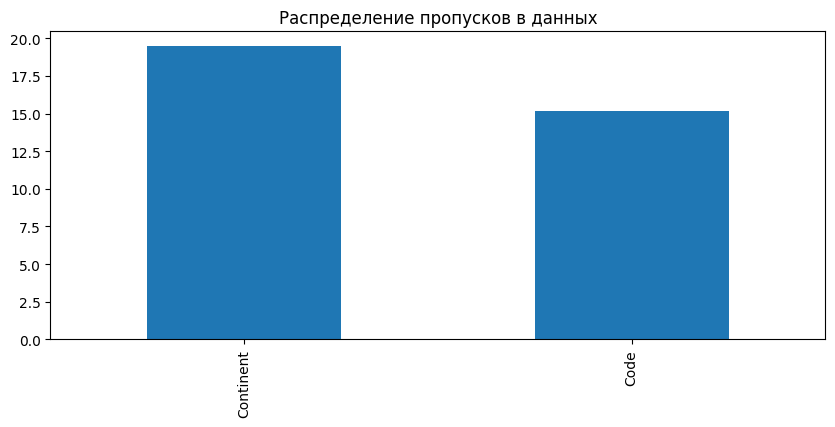

In [7]:
cols_null_persent = air_data_merged.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
# display(cols_with_null)
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

In [8]:
display(air_data_merged[air_data_merged['Continent'].isnull()])

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent
112,Andean Latin America,NaN,1990,80.138989,55.552438,23.447204,1.139348,NaN
113,Andean Latin America,NaN,1991,76.747352,51.936758,23.684478,1.126117,NaN
114,Andean Latin America,NaN,1992,77.437498,51.258707,25.030110,1.148682,NaN
115,Andean Latin America,NaN,1993,76.039527,49.271574,25.617766,1.150187,NaN
116,Andean Latin America,NaN,1994,72.787609,45.939797,25.724251,1.123561,NaN
...,...,...,...,...,...,...,...,...
6379,World,OWID_WRL,2013,71.270601,25.508332,39.533562,6.228707,NaN
6380,World,OWID_WRL,2014,69.470698,24.507390,38.773719,6.189589,NaN
6381,World,OWID_WRL,2015,69.160119,23.451821,39.493979,6.214319,NaN
6382,World,OWID_WRL,2016,67.183862,22.763017,38.203701,6.217144,NaN


In [14]:
display(air_data_merged[air_data_merged['Continent'].isna()]['Entity'].unique())

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Congo',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Macedonia', 'Micronesia (country)',
       'Middle SDI', 'Myanmar', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa', 'Swaziland',
       'Timor', 'Tropical Latin America', 'United States Virgin Islands',
       'Wales', 'Western Europe', 'Western Sub-Saha

In [18]:
display(air_data_merged[air_data_merged['Entity'] == 'Ireland'])

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",Continent
2772,Ireland,IRL,1990,44.743518,3.073052,38.975282,2.695183,Europe
2773,Ireland,IRL,1991,43.231427,2.746298,37.840990,2.644139,Europe
2774,Ireland,IRL,1992,42.427183,2.516127,37.265676,2.645379,Europe
2775,Ireland,IRL,1993,42.189069,2.345686,37.162996,2.680388,Europe
2776,Ireland,IRL,1994,40.667950,2.118600,35.928437,2.620912,Europe
2777,Ireland,IRL,1995,40.730455,1.979432,36.077735,2.673289,Europe
2778,Ireland,IRL,1996,39.108177,1.773624,34.747693,2.586860,Europe
2779,Ireland,IRL,1997,38.217553,1.643168,34.015971,2.558414,Europe
2780,Ireland,IRL,1998,37.256591,1.477136,33.270033,2.509423,Europe
2781,Ireland,IRL,1999,36.572848,1.374349,32.727520,2.470978,Europe
